In [1]:
root = "/home/wf/EEG_GTN/data/parser_save/seed_adj/20240105_09:12:22"

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import torch
from sklearn.decomposition import FastICA, PCA
import os
import pandas as pd
import seaborn as sns


def get_data(path, istrain):
    data = torch.load(path)
    flag = 0
    if not istrain:
        flag = 3
    # print(data)
    before = data[0+flag].cpu()
    after = data[1+flag].cpu()
    label = data[2+flag].cpu()
    print(before.shape,after.shape,label.shape)

    return before, after, label


def dim_reduce(data, n_comps=32, perplexity=16):

    tsne = TSNE(n_components=2, init='pca', perplexity=16)
    if data.shape[1] > 50:
        pca = PCA(n_components=n_comps)
        data = pca.fit_transform(data)
    return tsne.fit_transform(data)


def dim_reduce_pca(data, n_comps=32, perplexity=18):

    # tsne = TSNE(n_components=2, init='pca', perplexity=12)
    # if data.shape[1] > 50:
    tsne = TSNE(n_components=2, init='random', perplexity=18)
    pca = PCA(n_components=n_comps)
    data = pca.fit_transform(data)
    return tsne.fit_transform(data)


def view_features_tsne(data, labels, istrain, isbefore):
    x = data[:, 0].tolist()
    y = data[:, 1].tolist()
    labels = labels.tolist()
    # print(x.shape,y.shape)
    df = pd.DataFrame({'x': x, 'y': y, 'label': labels})
    sns.set_style('white')
    fig, ax = plt.subplots(figsize=(10, 10))

    sns.scatterplot(x='x', y='y', hue='label', data=df,
                    palette=sns.color_palette("hls", 3), ax=ax, s=100)
    # sns.scatterplot(x='x', y='y', hue='label', data=df, markers=["o", "x", "1"], ax=ax)
    ax.legend(labels=['negative', 'neutral', 'positive'], fontsize=20)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')

    if istrain:
        name = 'train_'+isbefore+'.pdf'
    else:
        name = 'test_'+isbefore+'.pdf'

    if not os.path.exists(os.path.join(root, 'tsne_pdf')):
        os.mkdir(os.path.join(root, 'tsne_pdf'))
    plt.savefig(os.path.join(root, 'tsne_pdf',name))

In [3]:
# 将所有人的测试数据放到一起做tsne

istrain = False
path = os.path.join(root, 'tsne_class')
tsne_names = os.listdir(path)

before_all = []
after_all = []
label_all = []
for tsne_name in tsne_names:
    before, after, label = get_data(os.path.join(path, tsne_name), istrain)
    before_all.append(before)
    after_all.append(after)
    label_all.append(label)

before_all = torch.cat(before_all, 0)
after_all = torch.cat(after_all, 0)
label_all = torch.cat(label_all, 0)

before_all = before_all.reshape(-1, before_all.shape[-1])
after_all = after_all.reshape(-1, after_all.shape[-1])

print(before_all.shape, after_all.shape, label_all.shape)

torch.Size([285, 82150]) torch.Size([285, 4096]) torch.Size([285])
torch.Size([330, 82150]) torch.Size([330, 4096]) torch.Size([330])
torch.Size([330, 82150]) torch.Size([330, 4096]) torch.Size([330])
torch.Size([330, 82150]) torch.Size([330, 4096]) torch.Size([330])
torch.Size([405, 82150]) torch.Size([405, 4096]) torch.Size([405])
torch.Size([300, 82150]) torch.Size([300, 4096]) torch.Size([300])
torch.Size([420, 82150]) torch.Size([420, 4096]) torch.Size([420])
torch.Size([345, 82150]) torch.Size([345, 4096]) torch.Size([345])
torch.Size([255, 82150]) torch.Size([255, 4096]) torch.Size([255])
torch.Size([345, 82150]) torch.Size([345, 4096]) torch.Size([345])
torch.Size([315, 82150]) torch.Size([315, 4096]) torch.Size([315])
torch.Size([450, 82150]) torch.Size([450, 4096]) torch.Size([450])
torch.Size([420, 82150]) torch.Size([420, 4096]) torch.Size([420])
torch.Size([240, 82150]) torch.Size([240, 4096]) torch.Size([240])
torch.Size([240, 82150]) torch.Size([240, 4096]) torch.Size([2

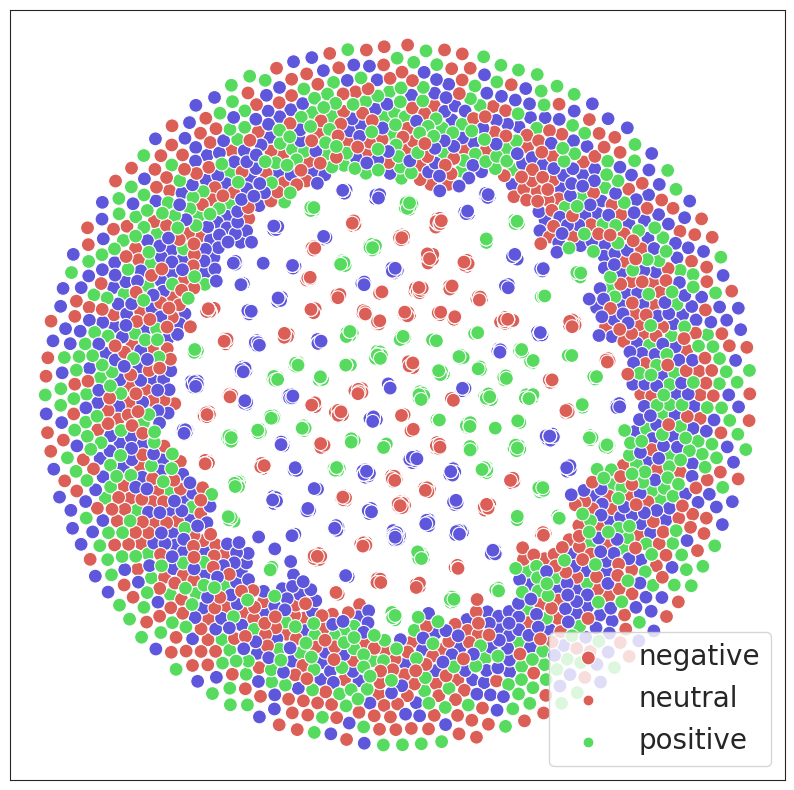

In [40]:
tsne_before = dim_reduce_pca(before_all.detach().numpy(), 32,5)
isbefore = 'before'
view_features_tsne(tsne_before, label_all, istrain, isbefore)

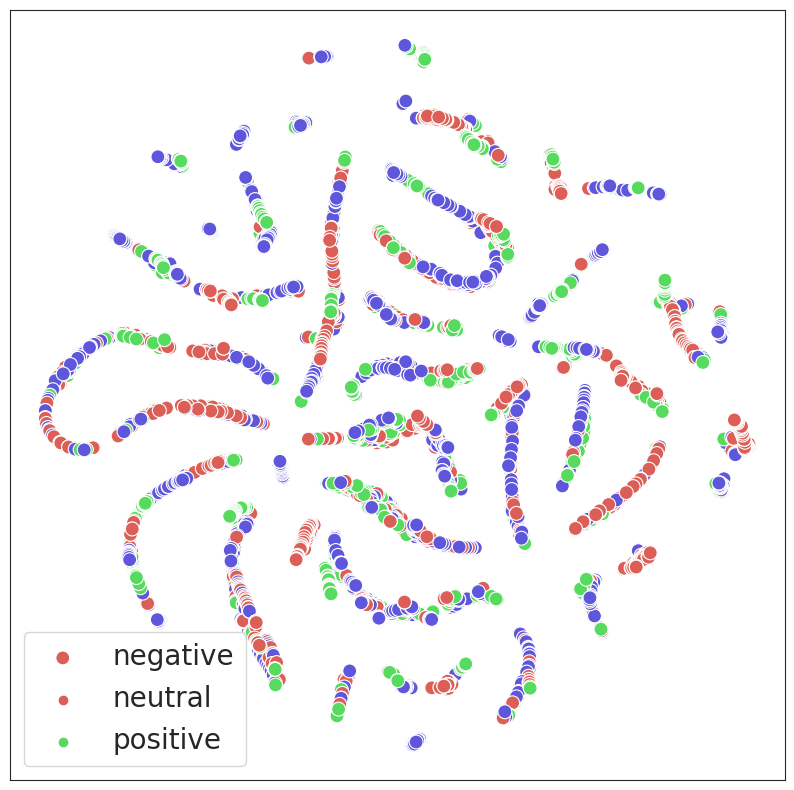

In [42]:
tsne_after = dim_reduce_pca(after_all.detach().numpy(), 16,16)
isbefore = 'after'
view_features_tsne(tsne_after, label_all, istrain, isbefore)